# **610 Course Project**
## **Face Recognition Using Principal Component Analysis and Fisherface Method**

**Submitted by**

*Abhishek Anand*

*18D070001*

In [ ]:
# importing required libraries
import numpy as np

from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt


# **Dataset**

In [ ]:
# fetching the dataset
dataset = fetch_lfw_people(min_faces_per_person=100)   # labelled faces in the wild data with users more than 100 faces

n_samples, height, width = dataset.images.shape

X = dataset.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = dataset.target
target_names = dataset.target_names
n_classes = target_names.shape[0]

print("Total DATASET size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

Total DATASET size:
n_samples: 1140
n_features: 2914
n_classes: 5


In [ ]:
dataset.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [ ]:
# splitting data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("Total DATASET size:")
print("training data size:",np.shape(X_train)  )
print("testing data size:" , np.shape(X_test))
print()

Total DATASET size:
training data size: (855, 2914)
training data size: (285, 2914)



## **Principal Component Analysis (PCA)**

## **n_components = 50**

In [ ]:
# using PCA

""" whiten PCA Whitening is a processing step for image based data that makes input less redundant.
 Adjacent pixel or feature values can be highly correlated, 
and whitening through the use of PCA reduces this degree of correlation. """


model = PCA(n_components=50,   whiten=True  ) 
pca = model.fit(X_train)

# extracting eigenfaces
eigenfaces = pca.components_.reshape((50, height, width))

#Projecting the input data on the eigenfaces orthonormal basis
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

param_grid = {'C': [100 , 500, 1000, 5000 ]  }

# gamma : {'scale', 'auto'} or float, default='scale'
# Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.

clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced' ,  ), param_grid)

clf = clf.fit(X_train_pca, y_train)

print("Best estimator found by grid search:")

print(clf.best_estimator_)


y_pred = clf.predict(X_test_pca)

print(classification_report(y_test, y_pred, target_names=target_names))

Best estimator found by grid search:
SVC(C=100, class_weight='balanced')
                   precision    recall  f1-score   support

     Colin Powell       0.98      0.89      0.93        64
  Donald Rumsfeld       0.92      0.75      0.83        32
    George W Bush       0.85      0.98      0.91       127
Gerhard Schroeder       0.84      0.55      0.67        29
       Tony Blair       0.81      0.88      0.84        33

         accuracy                           0.88       285
        macro avg       0.88      0.81      0.84       285
     weighted avg       0.88      0.88      0.87       285

[[ 57   1   6   0   0]
 [  0  24   6   2   0]
 [  1   1 124   1   0]
 [  0   0   6  16   7]
 [  0   0   4   0  29]]


## **n_components = 100**

In [ ]:
# using PCA

model = PCA(n_components=100 ,whiten=True)
pca = model.fit(X_train)

# extracting eigenfaces
eigenfaces = pca.components_.reshape((100, height, width))

#Projecting the input data on the eigenfaces orthonormal basis
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

param_grid = {'C': [100 , 500, 1000, 5000 ]  }

clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)

clf = clf.fit(X_train_pca, y_train)

print("Best estimator found by grid search:")

print(clf.best_estimator_)


y_pred = clf.predict(X_test_pca)

print(classification_report(y_test, y_pred, target_names=target_names))

Best estimator found by grid search:
SVC(C=100, class_weight='balanced')
                   precision    recall  f1-score   support

     Colin Powell       0.98      0.92      0.95        64
  Donald Rumsfeld       0.96      0.72      0.82        32
    George W Bush       0.86      0.99      0.92       127
Gerhard Schroeder       0.92      0.76      0.83        29
       Tony Blair       0.90      0.82      0.86        33

         accuracy                           0.90       285
        macro avg       0.92      0.84      0.88       285
     weighted avg       0.91      0.90      0.90       285



## **n_components = 200**

In [ ]:
# using PCA

pca = PCA(n_components=200, whiten=True).fit(X_train)

# extracting eigenfaces
eigenfaces = pca.components_.reshape((200, height, width))

#Projecting the input data on the eigenfaces orthonormal basis
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

param_grid = {'C': [100 , 500, 1000, 5000 ]  }

clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)

clf = clf.fit(X_train_pca, y_train)

print("Best estimator found by grid search:")

print(clf.best_estimator_)


y_pred = clf.predict(X_test_pca)

print(classification_report(y_test, y_pred, target_names=target_names))

Best estimator found by grid search:
SVC(C=100, class_weight='balanced')
                   precision    recall  f1-score   support

     Colin Powell       0.97      0.94      0.95        64
  Donald Rumsfeld       1.00      0.66      0.79        32
    George W Bush       0.81      0.99      0.89       127
Gerhard Schroeder       1.00      0.69      0.82        29
       Tony Blair       0.96      0.76      0.85        33

         accuracy                           0.88       285
        macro avg       0.95      0.81      0.86       285
     weighted avg       0.90      0.88      0.88       285



Text(0.5, 1.0, 'Variation in accuracy with number of components after PCA')

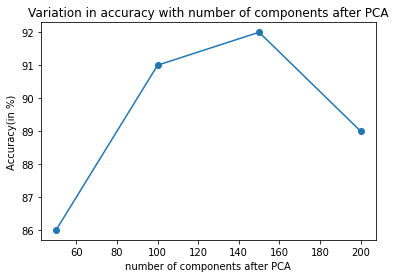

In [ ]:
accu = [86, 91 , 92, 89]
n_comp = [50,100,150,200]
#plt.figure(figsize=(5,5))
plt.plot(n_comp, accu,'o-')
plt.xlabel("number of components after PCA")
plt.ylabel("Accuracy(in %)")
plt.title("Variation in accuracy with number of components after PCA")

In [ ]:
# using PCA

model = PCA(n_components=150, whiten=True)
pca = model.fit(X_train)

# extracting eigenfaces
eigenfaces = pca.components_.reshape((150, height, width))

#Projecting the input data on the eigenfaces orthonormal basis
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)


estimating best parameters for Support Vector Classification using GridSearchCV

## **Training and Parameter Estimation**

In [ ]:
# this code segment is taken from sklearn documentation

param_grid = {'C': [100 , 500, 1000, 5000 ]  }

clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)

clf = clf.fit(X_train_pca, y_train)

print("Best estimator found by grid search:")

print(clf.best_estimator_)

Best estimator found by grid search:
SVC(C=1000.0, class_weight='balanced', gamma=0.005)


## **Prediction**

In [ ]:
y_pred = clf.predict(X_test_pca)

print(classification_report(y_test, y_pred, target_names=target_names))

print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))

                   precision    recall  f1-score   support

     Colin Powell       0.94      0.94      0.94        64
  Donald Rumsfeld       0.96      0.81      0.88        32
    George W Bush       0.90      0.98      0.94       127
Gerhard Schroeder       0.96      0.86      0.91        29
       Tony Blair       0.97      0.88      0.92        33

         accuracy                           0.93       285
        macro avg       0.95      0.89      0.92       285
     weighted avg       0.93      0.93      0.93       285

[[ 60   0   4   0   0]
 [  0  26   4   1   1]
 [  3   0 124   0   0]
 [  1   0   3  25   0]
 [  0   1   3   0  29]]


<class 'numpy.ndarray'>
['Colin Powell' 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Tony Blair']
[ 60  26 124  25  29]
Accuracy =  92.63157894736842 %


<Figure size 1080x1080 with 0 Axes>

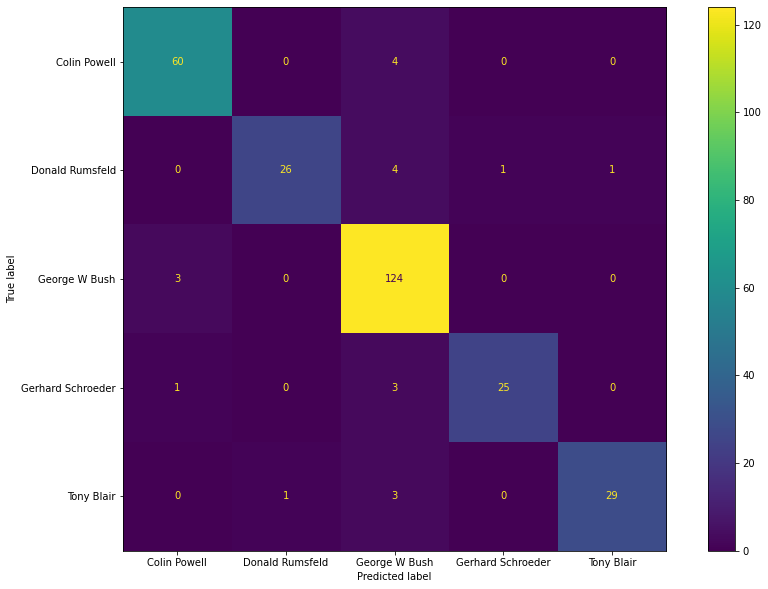

In [ ]:

cm = confusion_matrix(y_test, y_pred)

classes = target_names

print(type(cm))
print(classes)
print(np.diag(cm))
accuray = 0.0
accuray = sum(np.diag(cm)) / (sum(sum(cm)))
print('Accuracy = ',accuray*100,'%')

plt.figure(figsize=(15,15))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,  display_labels = classes)

fig, ax = plt.subplots(figsize=(15,10))
#cmp.plot(ax=ax)
disp.plot(ax=ax)
plt.show()

## **Visualizing the prediction**

In [ ]:
pred_name = 'a'
true_name = 'b'
a = 'predicted:' + pred_name + '    true:  ' +  true_name
print(a)

predicted:a    true:  b


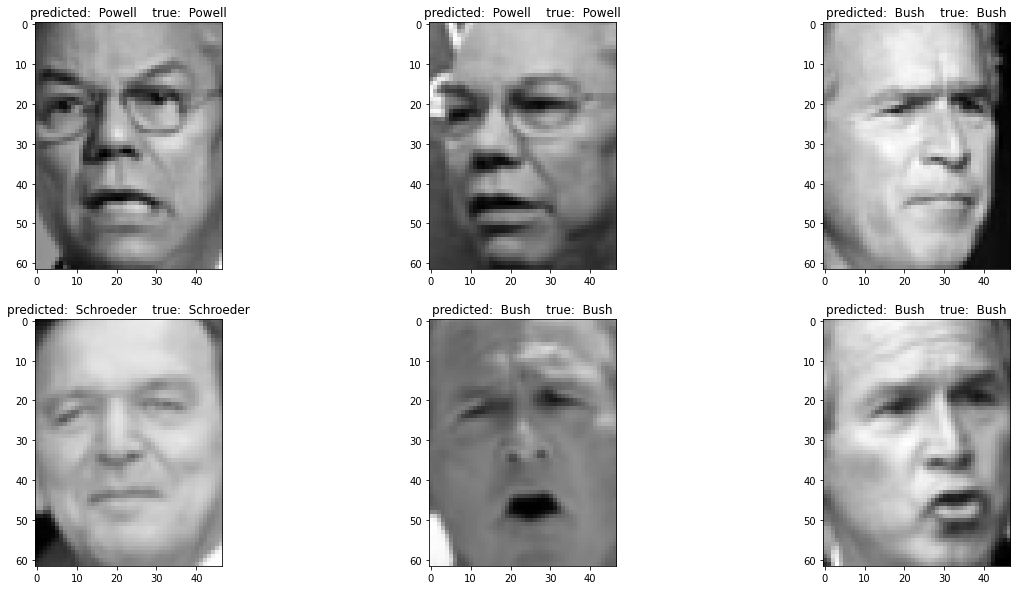

In [ ]:
prediction_titles = []
for i in range(y_pred.shape[0]):

    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    a = 'predicted:  ' + pred_name + '    true:  ' +  true_name

    prediction_titles.append(a )


n_row=2
n_col=3
plt.figure(figsize=(20,10))
for i in range(n_row * n_col):
    plt.subplot(n_row, n_col, i + 1)
    plt.imshow(X_test[i].reshape((height, width)), cmap=plt.cm.gray)

    plt.title(prediction_titles[i], size=12)

plt.show()


## **Visualizing the eigenfaces**

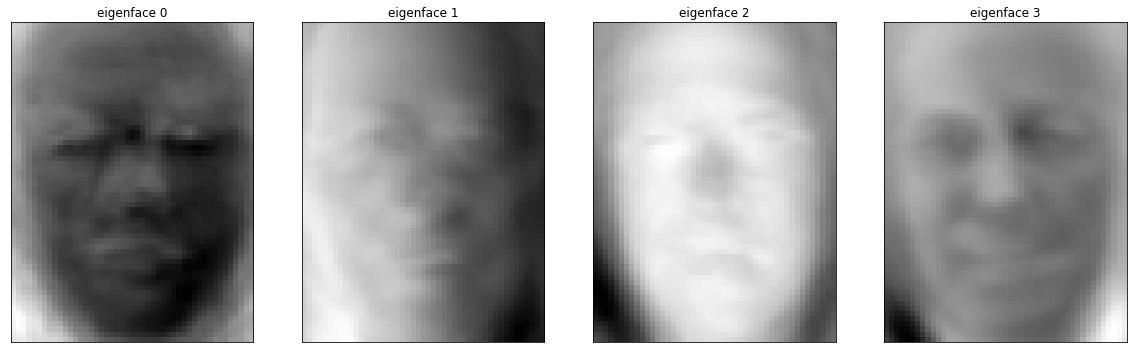

In [ ]:
# plot eigenfaces
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]

n_row=1
n_col=4

plt.figure(figsize=(20, 15))

for i in range(n_row * n_col):
    plt.subplot(n_row, n_col, i + 1)

    plt.imshow(eigenfaces[i].reshape((height, width)), cmap=plt.cm.gray)

    plt.title(eigenface_titles[i], size=12)

    plt.xticks(())
    plt.yticks(())

plt.show()

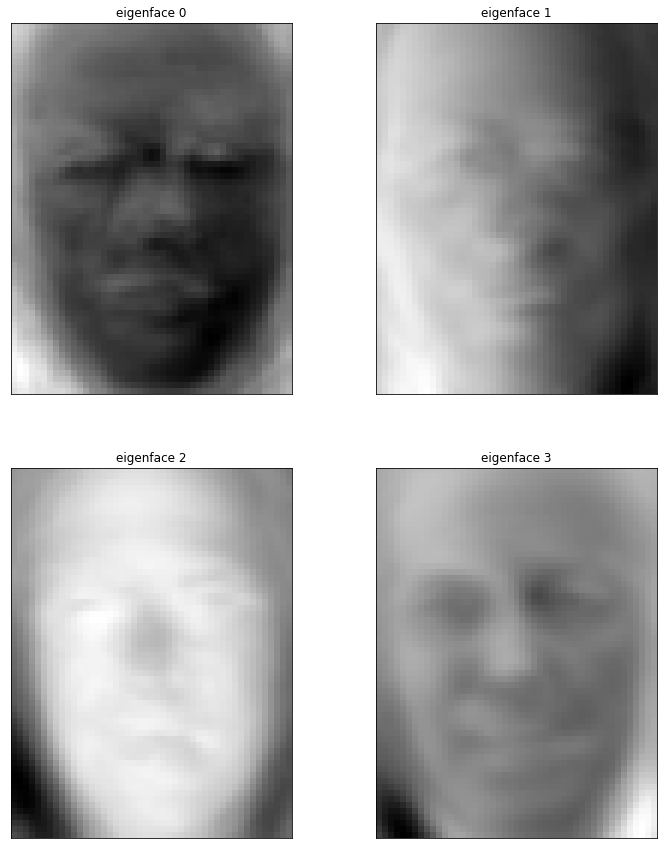

In [ ]:
# plot eigenfaces
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]

n_row=2
n_col=2

plt.figure(figsize=(12, 15))

for i in range(n_row * n_col):
    plt.subplot(n_row, n_col, i + 1)

    plt.imshow(eigenfaces[i].reshape((height, width)), cmap=plt.cm.gray)

    plt.title(eigenface_titles[i], size=12)

plt.show()

## **Fisher's Linear Discriminant (FDL)**

## **n_components = 50**

In [ ]:
# using PCA
# using PCA

pca = PCA(n_components=50, whiten=True).fit(X_train)

lda = LDA().fit(pca.transform(X_train), y_train)


#Projecting the input data on the eigenfaces orthonormal basis

X_train_lda = lda.transform(pca.transform(X_train))
X_test_lda = lda.transform(pca.transform(X_test))


param_grid = {'C': [100 , 500, 1000, 5000 ]  }

clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)

clf = clf.fit(X_train_lda, y_train)

print("Best estimator found by grid search:")

print(clf.best_estimator_)


y_pred = clf.predict(X_test_lda)

print(classification_report(y_test, y_pred, target_names=target_names))

Best estimator found by grid search:
SVC(C=100, class_weight='balanced')
                   precision    recall  f1-score   support

     Colin Powell       0.79      0.92      0.85        64
  Donald Rumsfeld       0.78      0.66      0.71        32
    George W Bush       0.89      0.84      0.87       127
Gerhard Schroeder       0.78      0.72      0.75        29
       Tony Blair       0.72      0.79      0.75        33

         accuracy                           0.82       285
        macro avg       0.79      0.79      0.79       285
     weighted avg       0.82      0.82      0.82       285



## **n_components = 100**

In [ ]:
# using PCA

pca = PCA(n_components=100, whiten=True).fit(X_train)

lda = LDA().fit(pca.transform(X_train), y_train)


#Projecting the input data on the eigenfaces orthonormal basis

X_train_lda = lda.transform(pca.transform(X_train))
X_test_lda = lda.transform(pca.transform(X_test))


param_grid = {'C': [100 , 500, 1000, 5000 ]  }

clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)

clf = clf.fit(X_train_lda, y_train)

print("Best estimator found by grid search:")

print(clf.best_estimator_)


y_pred = clf.predict(X_test_lda)

print(classification_report(y_test, y_pred, target_names=target_names))

Best estimator found by grid search:
SVC(C=1000.0, class_weight='balanced', gamma=0.0001)
                   precision    recall  f1-score   support

     Colin Powell       0.95      0.92      0.94        64
  Donald Rumsfeld       0.78      0.88      0.82        32
    George W Bush       0.97      0.91      0.94       127
Gerhard Schroeder       0.77      0.83      0.80        29
       Tony Blair       0.83      0.91      0.87        33

         accuracy                           0.90       285
        macro avg       0.86      0.89      0.87       285
     weighted avg       0.91      0.90      0.90       285

[[ 59   3   1   1   0]
 [  0  28   1   2   1]
 [  3   4 116   2   2]
 [  0   0   2  24   3]
 [  0   1   0   2  30]]


## **n_components = 200**

In [ ]:
# using PCA
# using PCA

pca = PCA(n_components=200, whiten=True).fit(X_train)

lda = LDA().fit(pca.transform(X_train), y_train)


#Projecting the input data on the eigenfaces orthonormal basis

X_train_lda = lda.transform(pca.transform(X_train))
X_test_lda = lda.transform(pca.transform(X_test))


param_grid = {'C': [100 , 500, 1000, 5000 ]  }

clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)

clf = clf.fit(X_train_lda, y_train)

print("Best estimator found by grid search:")

print(clf.best_estimator_)


y_pred = clf.predict(X_test_lda)

print(classification_report(y_test, y_pred, target_names=target_names))

Best estimator found by grid search:
SVC(C=1000.0, class_weight='balanced', gamma=0.0001)
                   precision    recall  f1-score   support

     Colin Powell       0.86      0.88      0.87        64
  Donald Rumsfeld       0.74      0.88      0.80        32
    George W Bush       0.96      0.85      0.90       127
Gerhard Schroeder       0.72      0.90      0.80        29
       Tony Blair       0.85      0.85      0.85        33

         accuracy                           0.86       285
        macro avg       0.82      0.87      0.84       285
     weighted avg       0.87      0.86      0.87       285

[[ 56   4   2   0   2]
 [  0  28   1   3   0]
 [  8   5 108   3   3]
 [  1   1   1  26   0]
 [  0   0   1   4  28]]


Text(0.5, 1.0, 'Variation in accuracy with PCA components in LDA')

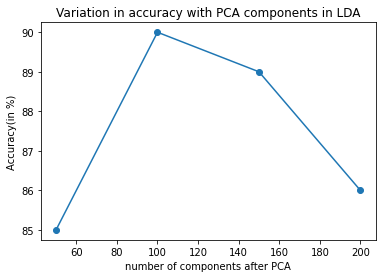

In [ ]:
accu = [85, 90 , 89, 86]
n_comp = [50,100,150,200]
#plt.figure(figsize=(5,5))
plt.plot(n_comp, accu,'o-')
plt.xlabel("number of components after PCA")
plt.ylabel("Accuracy(in %)")
plt.title("Variation in accuracy with PCA components in LDA")

In [ ]:
# using PCA

pca = PCA(n_components=150, whiten=True).fit(X_train)

lda = LDA().fit(pca.transform(X_train), y_train)


#Projecting the input data on the eigenfaces orthonormal basis

X_train_lda = lda.transform(pca.transform(X_train))
X_test_lda = lda.transform(pca.transform(X_test))


estimating best parameters for Support Vector Classification using GridSearchCV

## **Training and Parameter Estimation**

In [ ]:
# this code segment is taken from sklearn documentation

param_grid = {'C': [100 , 500, 1000, 5000 ]  }

clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)

clf = clf.fit(X_train_lda, y_train)

print("Best estimator found by grid search:")

print(clf.best_estimator_)

Best estimator found by grid search:
SVC(C=1000.0, class_weight='balanced', gamma=0.0001)


## **Prediction**

In [ ]:
y_pred = clf.predict(X_test_lda)

print(classification_report(y_test, y_pred, target_names=target_names))

print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))

                   precision    recall  f1-score   support

     Colin Powell       0.91      0.92      0.91        64
  Donald Rumsfeld       0.85      0.88      0.86        32
    George W Bush       0.97      0.89      0.93       127
Gerhard Schroeder       0.72      0.90      0.80        29
       Tony Blair       0.83      0.88      0.85        33

         accuracy                           0.89       285
        macro avg       0.86      0.89      0.87       285
     weighted avg       0.90      0.89      0.90       285

[[ 59   2   2   0   1]
 [  0  28   1   3   0]
 [  5   2 113   4   3]
 [  1   0   0  26   2]
 [  0   1   0   3  29]]


<class 'numpy.ndarray'>
['Colin Powell' 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Tony Blair']
[ 59  28 113  26  29]
Accuracy =  89.47368421052632 %


<Figure size 1080x1080 with 0 Axes>

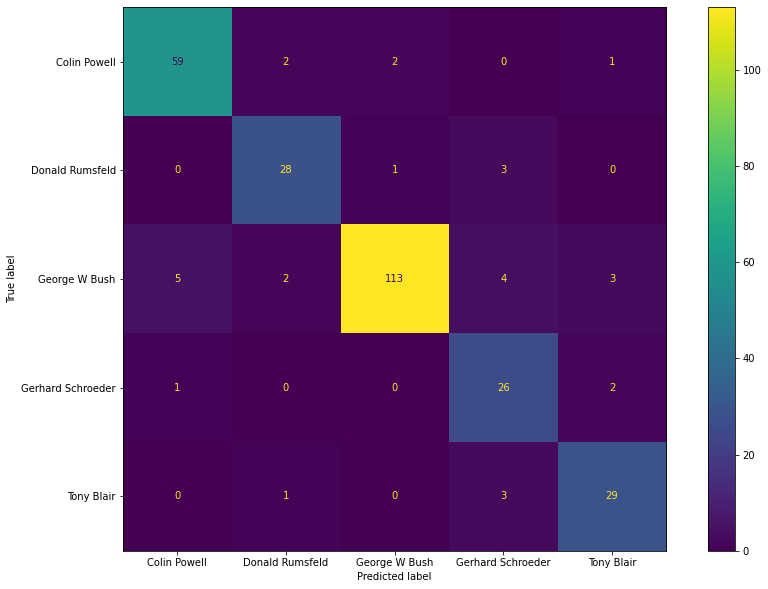

In [ ]:

cm = confusion_matrix(y_test, y_pred)

classes = target_names

print(type(cm))
print(classes)
print(np.diag(cm))
accuray = 0.0
accuray = sum(np.diag(cm)) / (sum(sum(cm)))
print('Accuracy = ',accuray*100,'%')

plt.figure(figsize=(15,15))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,  display_labels = classes)

fig, ax = plt.subplots(figsize=(15,10))
#cmp.plot(ax=ax)

disp.plot(ax=ax)
plt.show()

## **Visualizing the prediction**

In [ ]:
pred_name = 'a'
true_name = 'b'
a = 'predicted:' + pred_name + '    true:  ' +  true_name
print(a)

predicted:a    true:  b


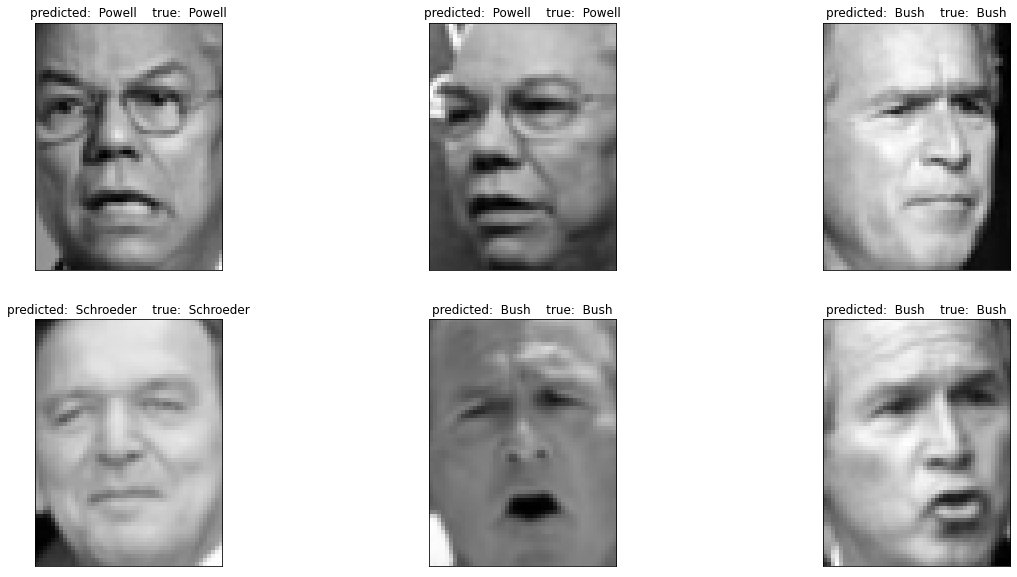

In [ ]:
prediction_titles = []
for i in range(y_pred.shape[0]):

    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    a = 'predicted:  ' + pred_name + '    true:  ' +  true_name

    prediction_titles.append(a )


n_row=2
n_col=3
plt.figure(figsize=(20,10))
for i in range(n_row * n_col):
    plt.subplot(n_row, n_col, i + 1)
    plt.imshow(X_test[i].reshape((height, width)), cmap=plt.cm.gray)

    plt.title(prediction_titles[i], size=12)

plt.show()


## **Visualizing the Fisherfaces**

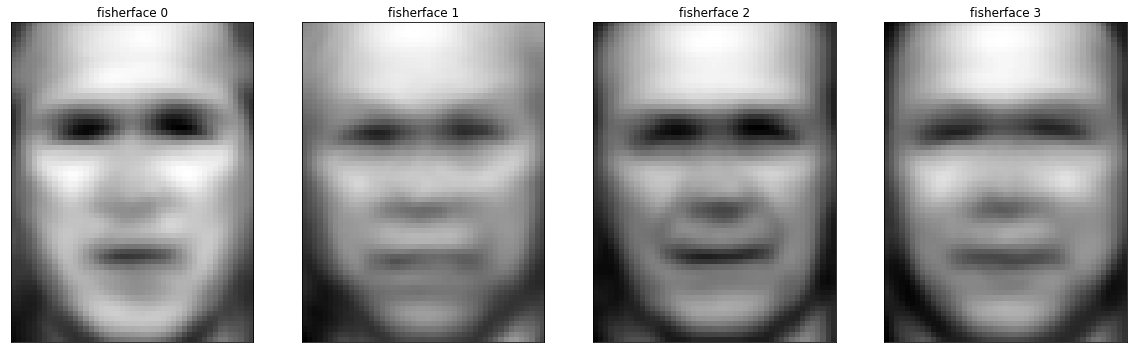

In [ ]:
# plot eigenfaces
fisherface_titles = ["fisherface %d" % i for i in range(4)]

n_row=1
n_col=4

plt.figure(figsize=(20, 15))
for i in range(n_row * n_col):
    plt.subplot(n_row, n_col, i + 1)

    plt.imshow(pca.inverse_transform(lda.scalings_[:, i]).reshape((height, width)), cmap=plt.cm.gray)

    plt.title(fisherface_titles[i], size=12)

plt.show()

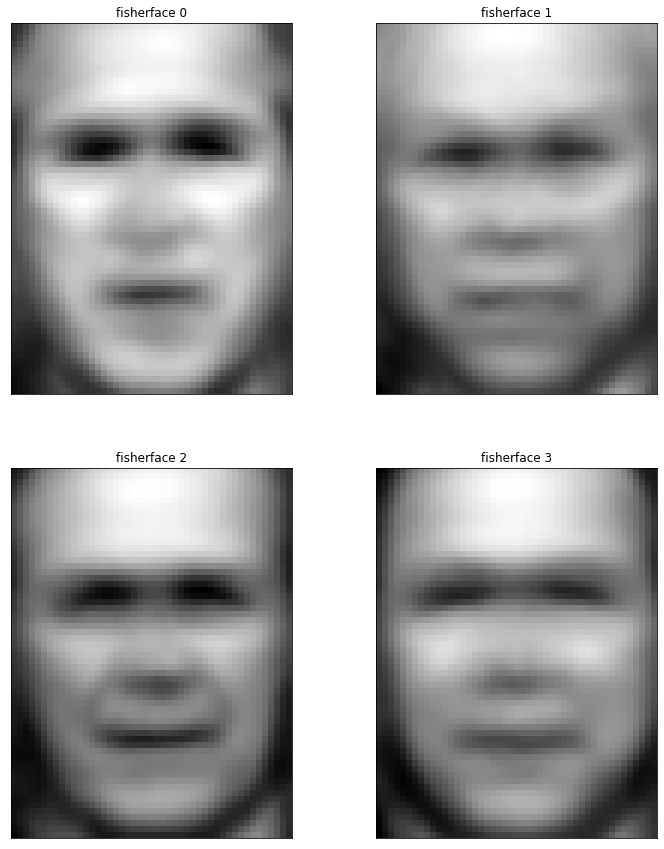

In [ ]:
# plot eigenfaces
fisherface_titles = ["fisherface %d" % i for i in range(4)]

n_row=2
n_col=2

plt.figure(figsize=(12, 15))
for i in range(n_row * n_col):
    plt.subplot(n_row, n_col, i + 1)

    plt.imshow(pca.inverse_transform(lda.scalings_[:, i]).reshape((height, width)), cmap=plt.cm.gray)

    plt.title(fisherface_titles[i], size=12)
plt.show()

# **References**



*   http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
*   http://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.htm


